In [1]:
import os
os.chdir('..')

In [10]:
import pandas as pd
import pickle as pkl
import numpy as np

In [3]:
df_altmetric = pd.read_csv('data/data_with_altmetric.csv')
with open('data/openalex_responses.pkl', 'rb') as f:
    openalex_responses = pkl.load(f)

In [4]:
df_altmetric = df_altmetric.loc[~openalex_responses.isna()].reset_index(drop=True)
openalex_responses = openalex_responses.loc[~openalex_responses.isna()]

In [5]:
inst_col = openalex_responses.apply(lambda resp: resp.pop('institutions'))

In [11]:
openalex_rows = openalex_responses.apply(pd.DataFrame, index=[0]).tolist()
openalex_df = pd.concat(openalex_rows).reset_index(drop=True)
openalex_df = openalex_df.assign(
    institutions = inst_col
)
openalex_df = openalex_df.reset_index(drop=True)
openalex_df['institutions'] = openalex_df['institutions'].apply(np.unique)

In [13]:
#df_altmetric = df_altmetric.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [14]:
df = pd.concat([df_altmetric, openalex_df], axis='columns')

In [15]:
df.to_csv('data/df_all.csv', index=False)

In [20]:
with open('data/df_all.pkl', 'wb') as f:
    pkl.dump(df, f)

In [23]:
from collections import defaultdict
import seaborn as sns

In [32]:
citations_count = defaultdict(lambda: 0)
papers_inst_count = defaultdict(lambda: 0)

In [33]:
for row in df.iterrows():
    row = row[1]
    for inst in row['institutions']:
        citations_count[inst] += row['cited_by_policies_count']
        papers_inst_count[inst] += 1

In [36]:
means = defaultdict(lambda: 0)
for key in citations_count.keys():
    means[key] = citations_count[key]/papers_inst_count[key]
means_items = means.items()

In [39]:
count_df = pd.DataFrame({
    'institution': [item[0] for item in means_items],
    'mean': [item[1] for item in means_items],
})

In [47]:
top_cited_institutions = count_df.sort_values('mean', ascending=False).head(10)

In [53]:
import matplotlib.pyplot as plt

plt.rcParams['figure.facetcolor'] = 'white'

KeyError: 'figure.facetcolor is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

<AxesSubplot:xlabel='mean', ylabel='institution'>

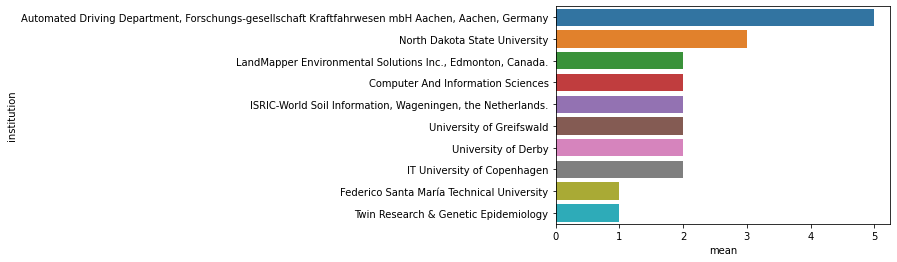

In [50]:
sns.barplot(data=top_cited_institutions, y='institution', x='mean')